# Part 1
# Part 1
# Part 1
# Part 1
# Part 1

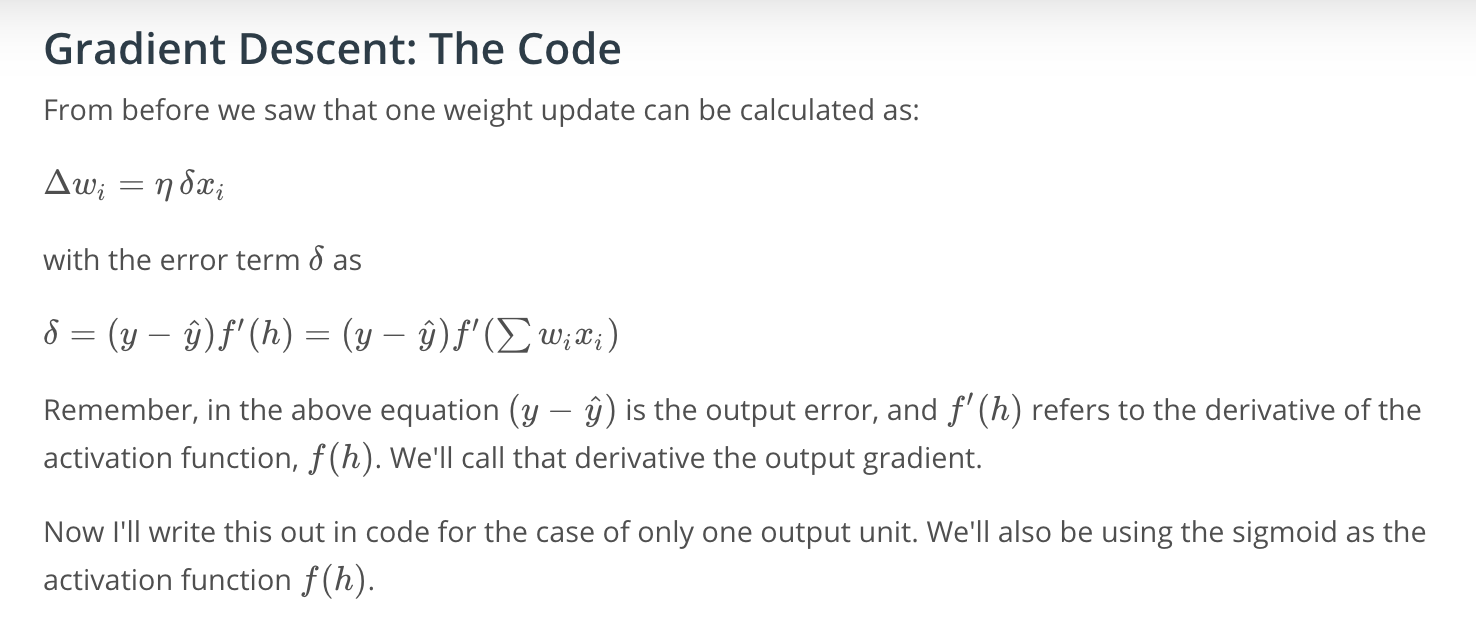

In [18]:
import numpy as np

# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consolidated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x,w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.

error_term = error * sigmoid_prime(h)

# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)


# TODO: Calculate change in weights
del_w = error_term * learnrate * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


# Part 2
# Part 2
# Part 2
# Part 2
# Part 2

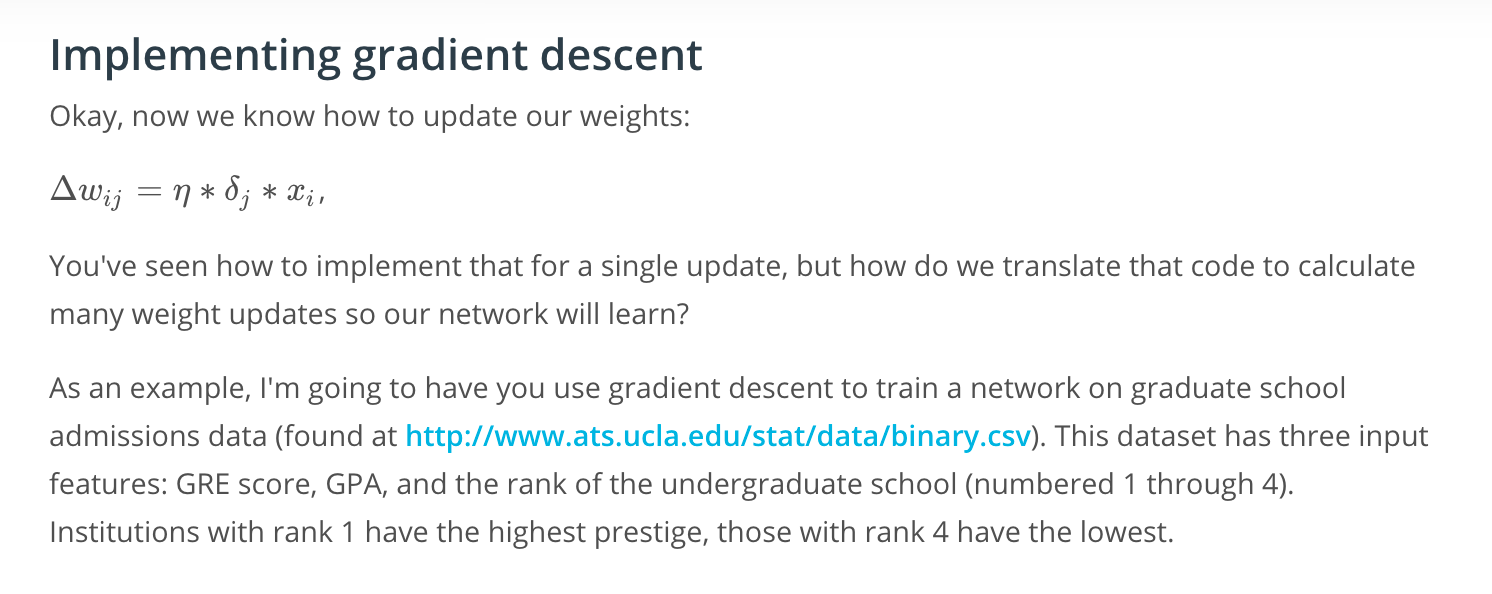

In [19]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_admission_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [20]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


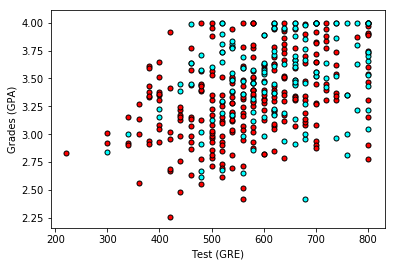

In [21]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

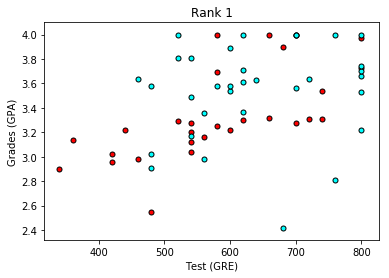

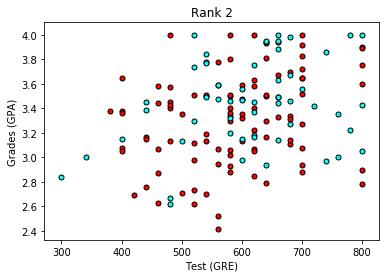

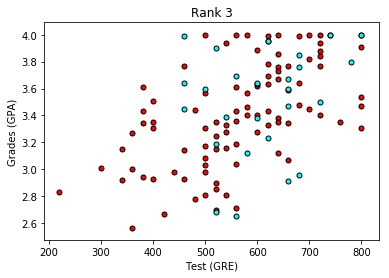

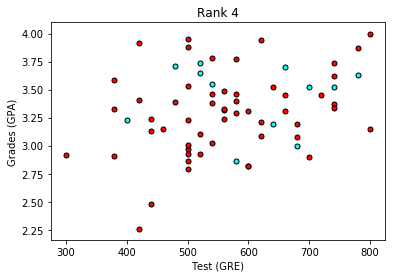

In [22]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

In [23]:
# TODO:  Make dummy variables for rank
one_hot_data =  pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# TODO: Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [24]:
for field in ['gre', 'gpa']:
    mean, std = one_hot_data[field].mean(), one_hot_data[field].std()
    one_hot_data.loc[:,field] = (one_hot_data[field]-mean)/std

In [25]:
# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,-1.798011,0.578348,0,0,1,0
1,1,0.625884,0.736008,0,0,1,0
2,1,1.837832,1.603135,1,0,0,0
3,1,0.452749,-0.525269,0,0,0,1
4,0,-0.586063,-1.208461,0,0,0,1
5,1,1.491561,-1.024525,0,1,0,0
6,1,-0.239793,-1.077078,1,0,0,0
7,0,-1.624876,-0.814312,0,1,0,0
8,1,-0.412928,0.000263,0,0,1,0
9,0,0.972155,1.392922,0,1,0,0


In [28]:
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(one_hot_data.index, size=int(len(one_hot_data)*0.9), replace=False)
one_hot_data, test_data = one_hot_data.ix[sample], one_hot_data.drop(sample)

# Split into features and targets
features, targets = one_hot_data.drop('admit', axis=1), one_hot_data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

/Users/derekwang/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


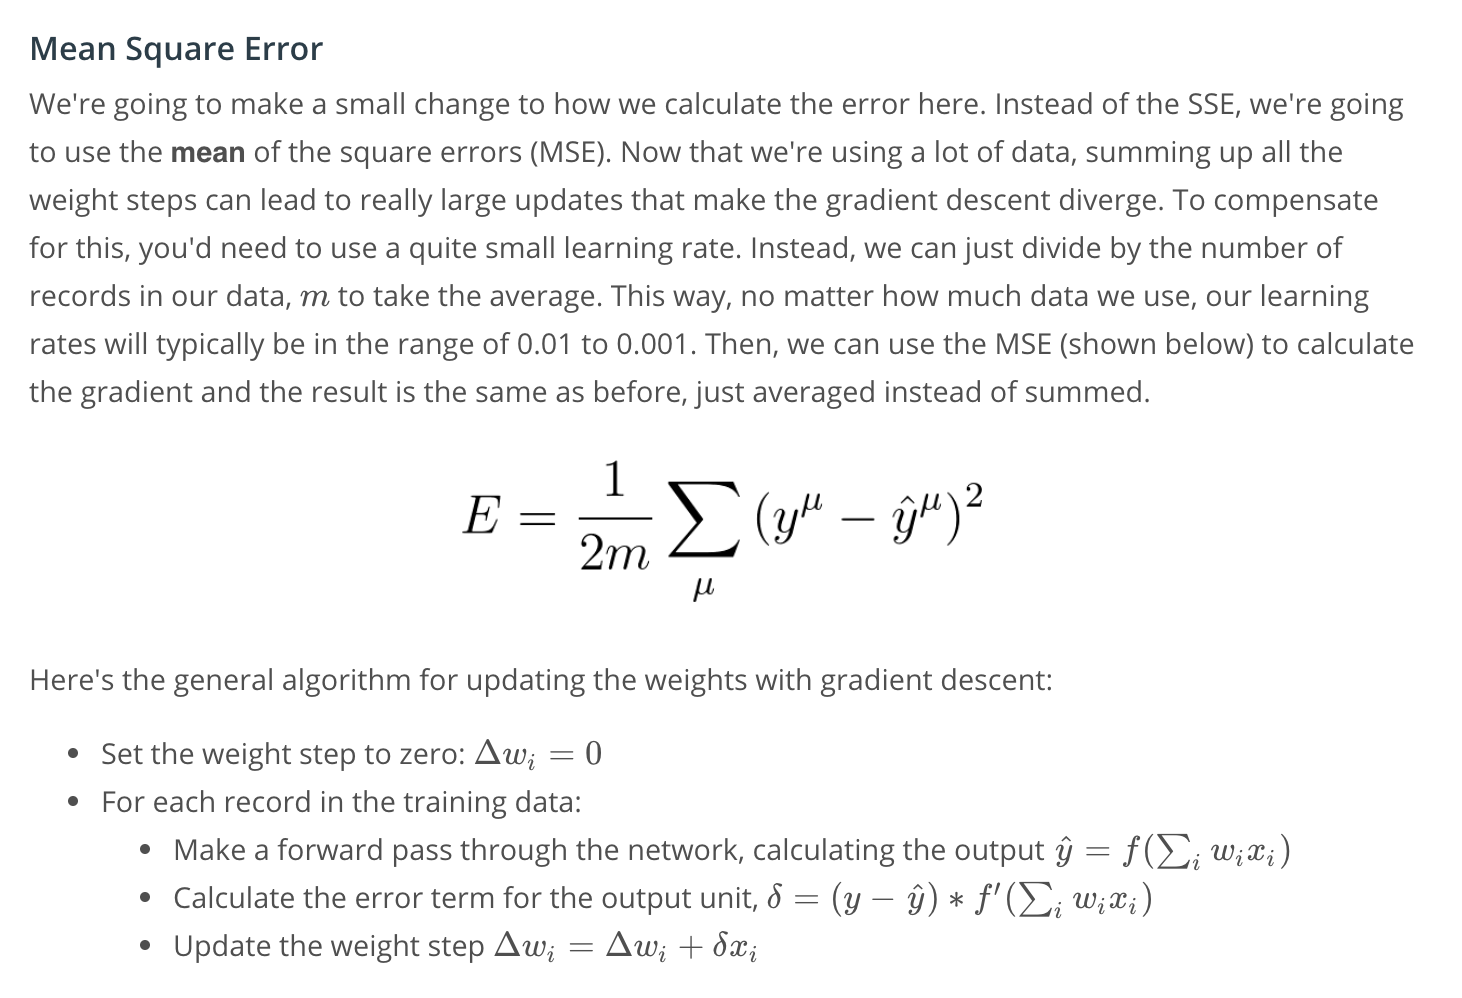

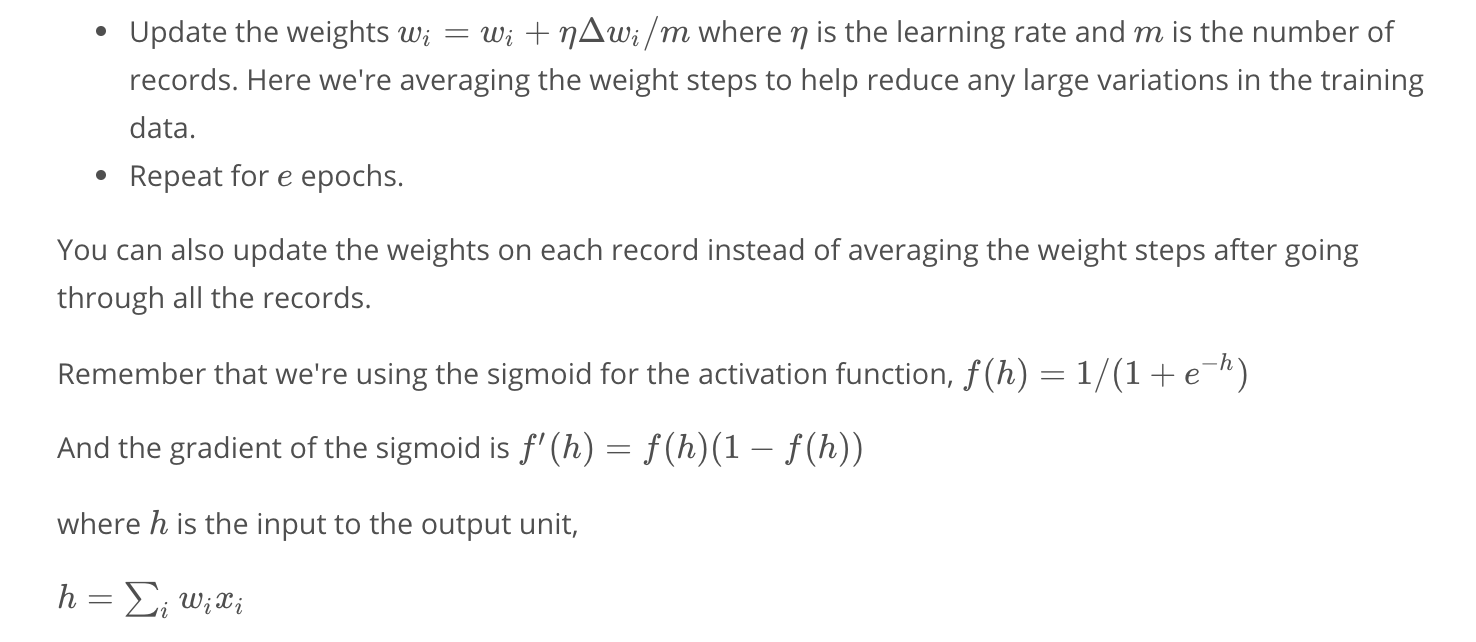

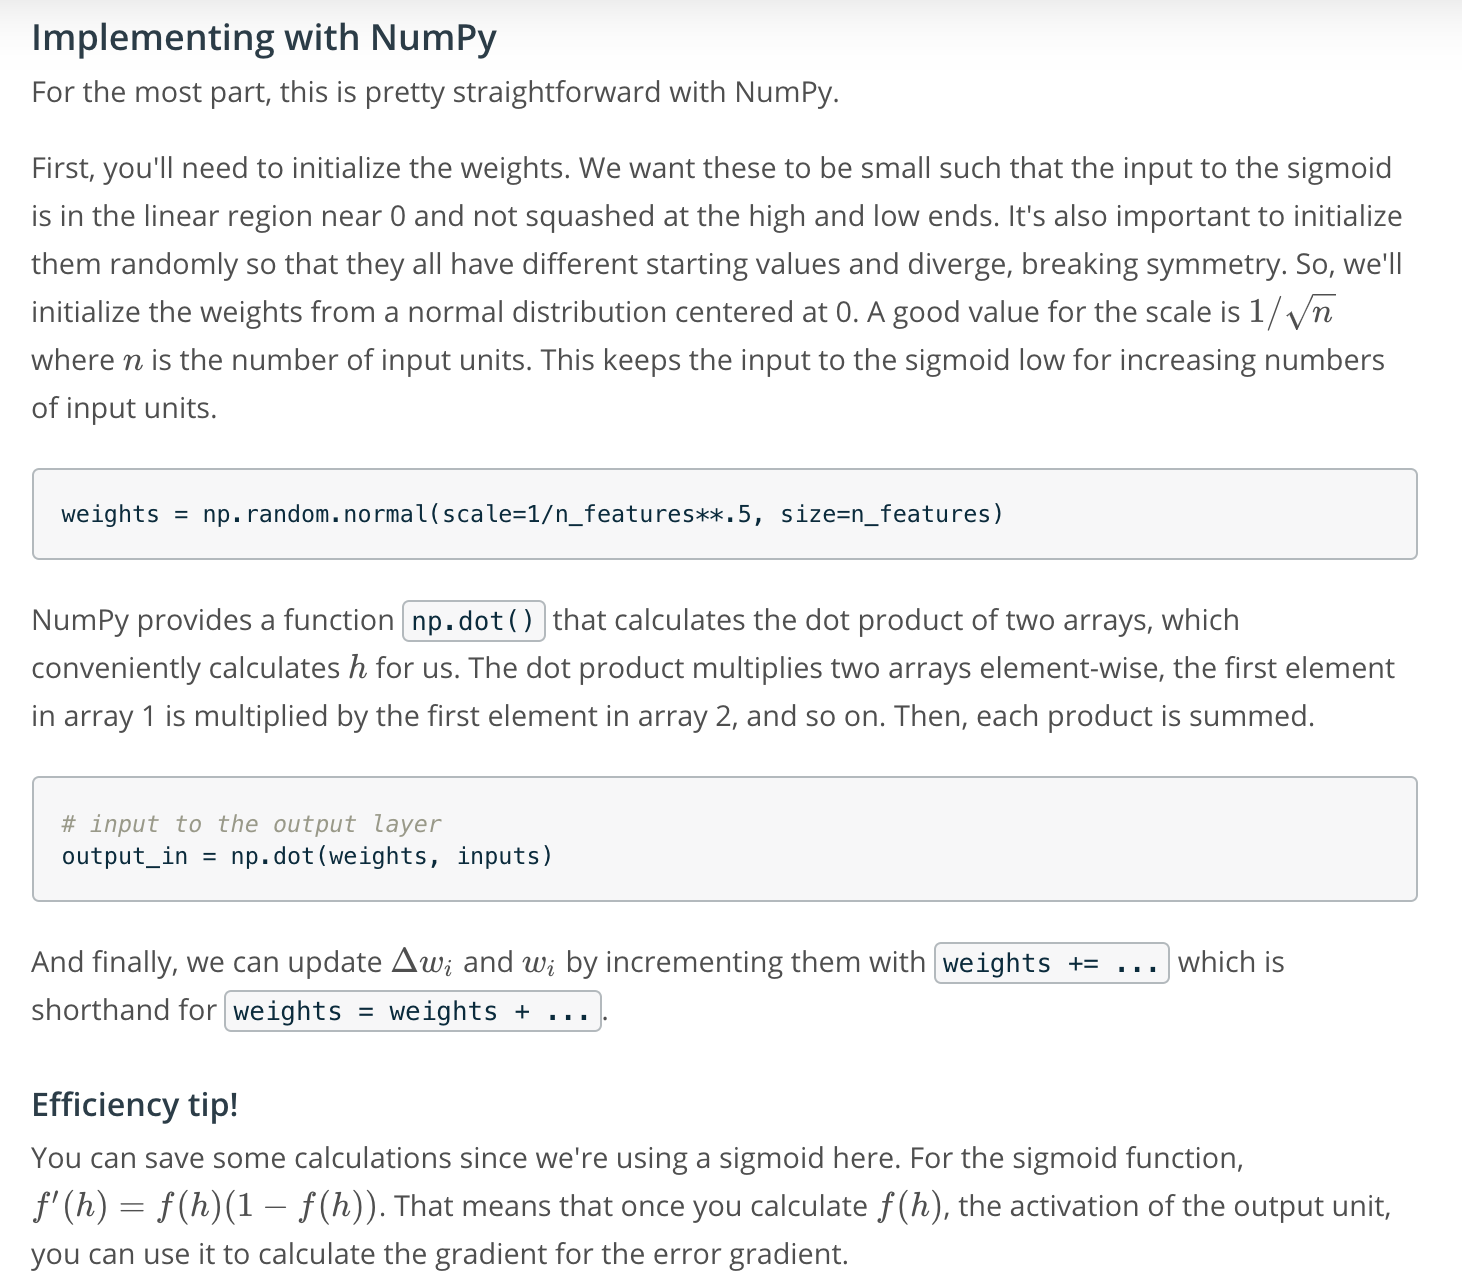

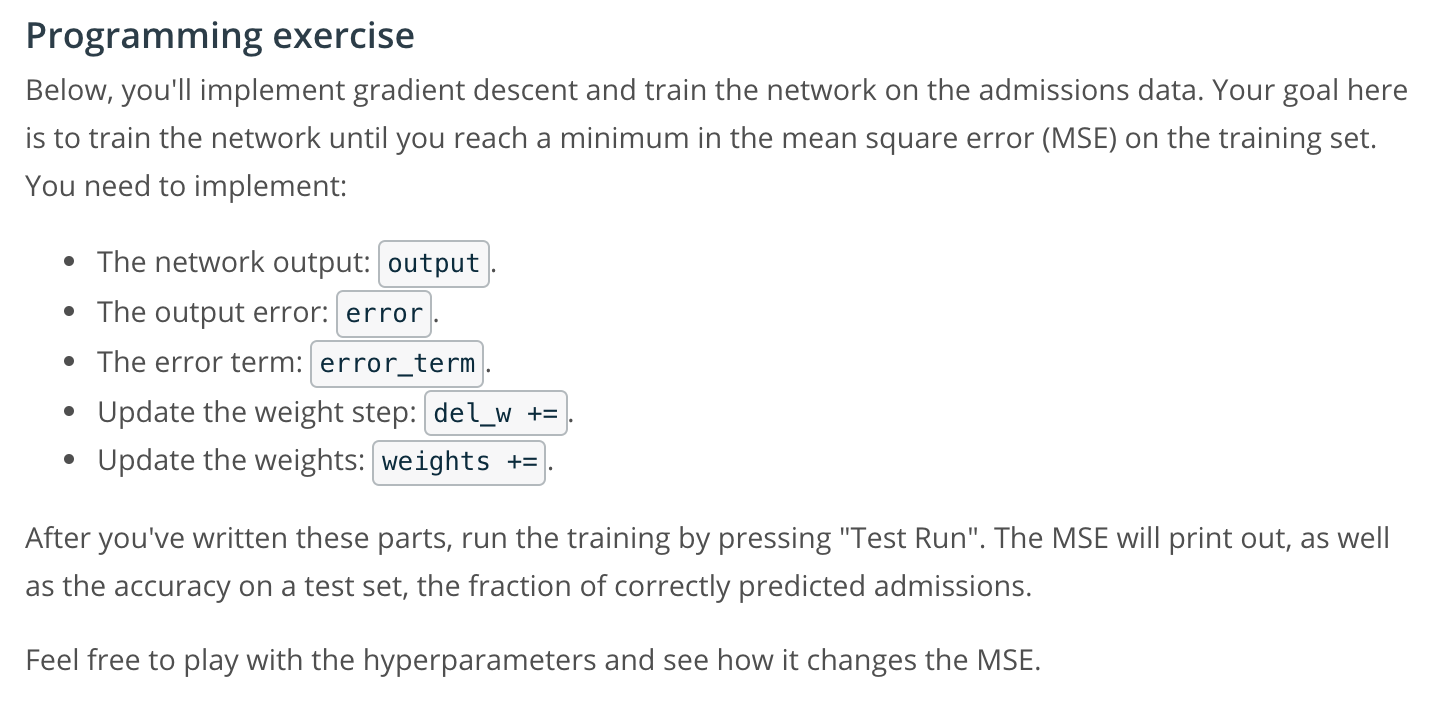

In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        output = sigmoid(np.dot(x, weights))

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        # The error term
        #   Notice we calulate f'(h) here instead of defining a separate
        #   sigmoid_prime function. This just makes it faster because we
        #   can re-use the result of the sigmoid function stored in
        #   the output variable
        error_term = error * output * (1-output)

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += error_term * x

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.26276093849966364
Train loss:  0.20928619409324895
Train loss:  0.20084292908073417
Train loss:  0.1986215647552789
Train loss:  0.19779851396686018
Train loss:  0.19742577912189863
Train loss:  0.19723507746241065
Train loss:  0.19712945625092465
Train loss:  0.19706766341315077
Train loss:  0.19703005801777368
Prediction accuracy: 0.725
